In [1]:
cd
use "..\Data\cleaned_cps"

keep if weekly_wage_less_than_sixtyseven == 0 // Get rid of bottom coded weekly wages
keep if fulltime == 1 
keep if fullyear == 1
keep if allocated_earnings == 0
keep if wageworker == 1 // we don't want to include self employed workers
keep if female == 0 // We want to keep male wages
replace experience =round(experience,1)
keep if experience >= 0 & experience <= 39
keep if weekly_wage != .
gen log_weekly_wage = log(real_weekly_wage)



C:\Users\Rafael\Eco 797 - Practicum in Empirical Analysis\Analysis


(300,236 observations deleted)

(592,316 observations deleted)

(458,588 observations deleted)

(464,161 observations deleted)

(265,434 observations deleted)

(952,890 observations deleted)

(686,858 real changes made)

(82,654 observations deleted)

(851 observations deleted)



In [2]:
/* Remake schooling categories */ 
gen slhsd = schooling == 1 // high school dropout
gen slhsg = schooling == 2 // high school graduate
gen slsmc = schooling == 3 // some college
gen slclg = schooling == 4 // college graduate
gen slclp = schooling == 5 // college plus

gen exp_cat=int(experience/3)+1
replace exp_cat=16 if exp_cat==17
assert exp_cat>=1 & exp_cat<=16
table exp_cat, c(mean experience min experience max experience)

foreach sl of numlist 1/5 {
  foreach exp of numlist 1/16 {
     gen  sl`sl'exp`exp' = (schooling==`sl')*(exp_cat==`exp')
  }
}


*drop sl2exp1
keep year asecwt female log_weekly_wage sl1exp1-sl5exp16  fulltime fullyear weekly_wage_less_than_sixtyseven








(0 real changes made)



----------------------------------------------------------
  exp_cat | mean(experi~e)   min(experi~e)   max(experi~e)
----------+-----------------------------------------------
        1 |       1.082422               0               2
        2 |        4.05451               3               5
        3 |       7.015787               6               8
        4 |        10.0017               9              11
        5 |        12.9925              12              14
        6 |       15.98991              15              17
        7 |       18.99039              18              20
        8 |       21.98824              21              23
        9 |       24.98327              24              26
       10 |        27.9822              27              29
       11 |       30.97343              30              32
       12 |       33.96388              33              35
       13 |       36.95319              36              38
       14 |             

In [4]:
/* I regress according to AKK's 2008 specifications */
regress log_weekly_wage sl* [aw=asecwt] if female == 0 & fulltime == 1 & fullyear == 1 & ///
weekly_wage_less_than_sixtyseven == 0
predict residuals if female == 0 & fulltime == 1 & fullyear == 1 & ///
weekly_wage_less_than_sixtyseven == 0, residuals                 
summ residuals [aw=asecwt], det


(sum of wgt is 2,035,528,410.065)
note: sl1exp15 omitted because of collinearity
note: sl1exp16 omitted because of collinearity
note: sl2exp15 omitted because of collinearity
note: sl2exp16 omitted because of collinearity
note: sl3exp15 omitted because of collinearity
note: sl3exp16 omitted because of collinearity
note: sl4exp14 omitted because of collinearity
note: sl4exp15 omitted because of collinearity
note: sl4exp16 omitted because of collinearity
note: sl5exp15 omitted because of collinearity
note: sl5exp16 omitted because of collinearity

      Source |       SS           df       MS      Number of obs   = 1,271,857
-------------+----------------------------------   F(69, 1271787)  =   9154.33
       Model |  157144.567        69   2277.4575   Prob > F        =    0.0000
    Residual |  316401.246 1,271,787  .248784777   R-squared       =    0.3318
-------------+----------------------------------   Adj R-squared   =    0.3318
       Total |  473545.813 1,271,856  .372326594   R

In [5]:
collapse (mean) mean=residuals (p10) p10=residuals (p90) p90=residuals [aweight=asecwt], by(year)
describe
gen residual91 = 100*(p90-p10)




Contains data
  obs:            57                          
 vars:             4                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g                 survey year
mean            float   %9.0g                 (mean) residuals
p10             float   %9.0g                 (p 10) residuals
p90             float   %9.0g                 (p 90) residuals
--------------------------------------------------------------------------------
Sorted by: year
     Note: Dataset has changed since last saved.



In [6]:
keep year residual91
save "../Data/residual-90-10", replace
clear



file ../Data/residual-90-10.dta saved



In [7]:
cd
use "..\Data\cleaned_cps"

keep if weekly_wage_less_than_sixtyseven == 0 // Get rid of bottom coded weekly wages
keep if fulltime == 1 
keep if fullyear == 1
keep if allocated_earnings == 0
keep if wageworker == 1 // we don't want to include self employed workers
keep if female == 0 // We want to keep male wages
replace experience =round(experience,1)
keep if experience >= 0 & experience <= 39
keep if weekly_wage != .
gen log_weekly_wage = log(real_weekly_wage)



C:\Users\Rafael\Eco 797 - Practicum in Empirical Analysis\Analysis


(300,236 observations deleted)

(592,316 observations deleted)

(458,588 observations deleted)

(464,161 observations deleted)

(265,434 observations deleted)

(952,890 observations deleted)

(686,858 real changes made)

(82,654 observations deleted)

(851 observations deleted)



In [8]:
collapse (mean) mean=log_weekly_wage (p10) p10=log_weekly_wage (p90) p90=log_weekly_wage [aweight=asecwt], by(year)
describe
generate overall91 =100*(p90-p10)
keep year overall91





Contains data
  obs:            57                          
 vars:             4                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g                 survey year
mean            float   %9.0g                 (mean) log_weekly_wage
p10             float   %9.0g                 (p 10) log_weekly_wage
p90             float   %9.0g                 (p 90) log_weekly_wage
--------------------------------------------------------------------------------
Sorted by: year
     Note: Dataset has changed since last saved.




In [9]:
merge m:1 year using "../Data/relative_wage", keep(match) nogenerate
merge m:1 year using "../Data/residual-90-10", keep(match) nogenerate
replace year = year -1 



    Result                           # of obs.
    -----------------------------------------
    not matched                             0
    matched                                57  
    -----------------------------------------


    Result                           # of obs.
    -----------------------------------------
    not matched                             0
    matched                                57  
    -----------------------------------------

(57 real changes made)


In [10]:
sum
describe



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        year |         57        1991    16.59819       1963       2019
   overall91 |         57     145.747    20.81391   109.8612   176.1988
college_hs~p |         57    .5366747     .109196   .3803658    .682488
  residual91 |         57     118.029    12.64028    96.7798   138.6895


Contains data
  obs:            57                          
 vars:             4                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g                 survey year
overall91       float   %9.0g                 
college_hs_gap  float   %9.0g                 (mean) college_hs_gap
residual91      flo

In [11]:
replace college_hs_gap = college_hs_gap * 100

(57 real changes made)


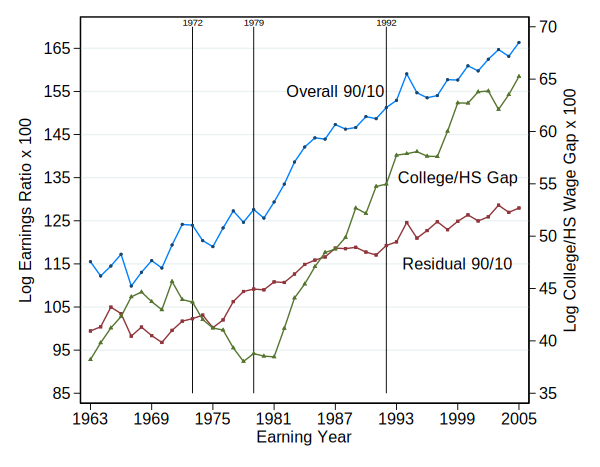




(file ..\Results\figure2-05.pdf written in PDF format)


In [12]:
twoway connected overall91 residual91 year if year <= 2005, sort msize(vsmall vsmall) msymbol(o s)  ///
lcolor(midblue)  xtitle(Earning Year) xlabel(1963(6)2005) ytitle("Log Earnings Ratio x 100", axis(1)) ///
ylabel(85(10)170, angle(0)) graphregion(color(white)) ///
|| connected college_hs_gap year if year <= 2005, sort msize(vsmall) msymbol(t) yaxis(2) legend(off) ///
ytitle(" Log College/HS Wage Gap x 100", axis(2)) ylabel(35(5)70, angle(0) axis(2)) ///
xsize(4.5) ysize(3.5) text(155 1987 "Overall 90/10") text(135 1999 "College/HS Gap") ///
text(115 1999 "Residual 90/10") xline(1973, lwidth(thin) lcolor(black) noextend) ///
xline(1979, lwidth(thin) lcolor(black) noextend) xline(1992, lwidth(thin) lcolor(black) noextend) ///
text(171 1973 "1972",size(vsmall)) text(171 1979 "1979",size(vsmall)) text(171 1992 "1992",size(vsmall)) ///
plotregion(lcolor(black)) 
graph export "..\Results\figure2-05.pdf", as(pdf) replace


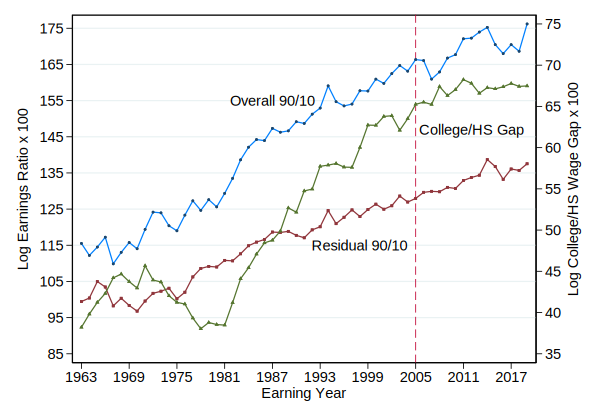




(file ..\Results\figure2-19.pdf written in PDF format)


In [13]:
twoway connected overall91 residual91 year, sort msize(vsmall vsmall) msymbol(o s) lcolor(midblue) ///
xtitle(Earning Year) xlabel(1963(6)2019) ytitle("Log Earnings Ratio x 100", axis(1))  ylabel(85(10)175, angle(0)) ///
graphregion(color(white)) || connected college_hs_gap year, sort msize(vsmall) msymbol(t) yaxis(2) ///
ytitle(" Log College/HS Wage Gap x 100", axis(2)) ylabel(35(5)75, angle(0) axis(2)) xsize(5) ysize(3.5) ///
text(155 1987 "Overall 90/10") text(147 2012 "College/HS Gap") text(115 1998 "Residual 90/10") ///
xline(2005, lwidth(thin) lcolor(cranberry) lpattern(dash)) legend(off) plotregion(lcolor(black)) 
graph export "..\Results\figure2-19.pdf", as(pdf) replace
